# Amazon Electronics Sales Dataset

## Sales Data Analysis and Dashboard

In [61]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Dataset

In [64]:
df = pd.read_csv("C:/Users/amanj/Desktop/Dataset/Cleaned Dataset/cleaned_electronics.csv")

In [65]:
df

,user_id,rating,date,gender,category,brand,month,year,day,weekday
0,0,5,13-06-1999,Female,Portable Audio & Video,Random,June,1999,13,Sunday
1,1,5,14-06-1999,Female,Portable Audio & Video,Random,June,1999,14,Monday
2,2,3,17-06-1999,Female,Portable Audio & Video,Random,June,1999,17,Thursday
3,3,1,01-07-1999,Female,Portable Audio & Video,Random,July,1999,1,Thursday
4,4,2,06-07-1999,Female,Portable Audio & Video,Random,July,1999,6,Tuesday
...,...,...,...,...,...,...,...,...,...,...
1048570,415948,5,04-02-2017,Both,Computers & Accessories,Random,February,2017,4,Saturday
1048571,941858,5,04-02-2017,Both,Home Audio,Pyle,February,2017,4,Saturday
1048572,941454,5,04-02-2017,Female,Computers & Accessories,Logitech,February,2017,4,Saturday
1048573,941859,5,04-02-2017,Both,Computers & Accessories,Random,February,2017,4,Saturday


# Dimensionality of the DataFrame

In [67]:
df.size

10485750

# Size of the DataFrame

In [69]:
df.shape

(1048575, 10)

# Information about a DataFrame including the index dtype and columns, non-null values and memory usage.


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   user_id   1048575 non-null  int64 
 1   rating    1048575 non-null  int64 
 2   date      1048575 non-null  object
 3   gender    1048575 non-null  object
 4   category  1048575 non-null  object
 5   brand     1048575 non-null  object
 6   month     1048575 non-null  object
 7   year      1048575 non-null  int64 
 8   day       1048575 non-null  int64 
 9   weekday   1048575 non-null  object
dtypes: int64(4), object(6)
memory usage: 80.0+ MB


In [72]:
df.isnull().sum()

user_id     0
rating      0
date        0
gender      0
category    0
brand       0
month       0
year        0
day         0
weekday     0
dtype: int64

# Statistical Analysis Including dtype Object

In [74]:
df.describe(include = 'object')

,date,gender,category,brand,month,weekday
count,1048575,1048575,1048575,1048575,1048575,1048575
unique,5753,3,10,51,12,7
top,20-01-2016,Female,Headphones,Random,January,Monday
freq,1692,396632,295747,775265,126018,168076


## Distribution checks

In [76]:
df['gender'].value_counts()

gender
Female    396632
Male      357229
Both      294714
Name: count, dtype: int64

In [77]:
df['category'].value_counts()

category
Headphones                 295747
Computers & Accessories    262809
Camera & Photo             156758
Accessories & Supplies     134418
Portable Audio & Video     103563
Television & Video          28303
Car Electronics & GPS       25841
Home Audio                  19154
Wearable Technology         13185
Security & Surveillance      8797
Name: count, dtype: int64

In [78]:
df['brand'].value_counts()

brand
Random          775265
Logitech         23360
Bose             22210
Sony             18953
EldHus           14374
Mpow             11306
Fujifilm         10469
Sennheiser       10398
Etre Jeune       10305
Pyle              9711
JLAB              9285
TaoTronics        9266
Kodak             8493
Linksys           8002
Samsung           6876
Garmin            6719
Canon             6373
Jabra             6212
Skullcandy        6154
Philips           5954
Panasonic         5943
Fintie            5868
Nikon             5827
Apple             5607
Neewer            4585
Polaroid          4368
Uniden            3698
Olympus           3511
ViewSonic         3093
ebasy             2290
Plemo             2193
Toshiba           1986
HP                1885
DBPOWER           1814
XShields          1588
LSS               1557
JVC               1474
Tiamat            1464
Generic           1370
Savage            1255
Gary Fong         1080
Archos             957
iRULU              944
IRULU

In [79]:
df['month'].value_counts()

month
January      126018
December     111469
August        89862
July          85433
November      84957
September     83759
March         83185
October       83166
February      82421
June          73665
May           73532
April         71108
Name: count, dtype: int64

## Ratings by gender

In [81]:
df.groupby('gender')['rating'].mean()

gender
Both      4.095102
Female    4.081501
Male      4.015598
Name: rating, dtype: float64

In [82]:
df.nunique()

user_id     941861
rating           5
date          5753
gender           3
category        10
brand           51
month           12
year            19
day             31
weekday          7
dtype: int64

# Importing Libraries For Visulization

In [84]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import calendar

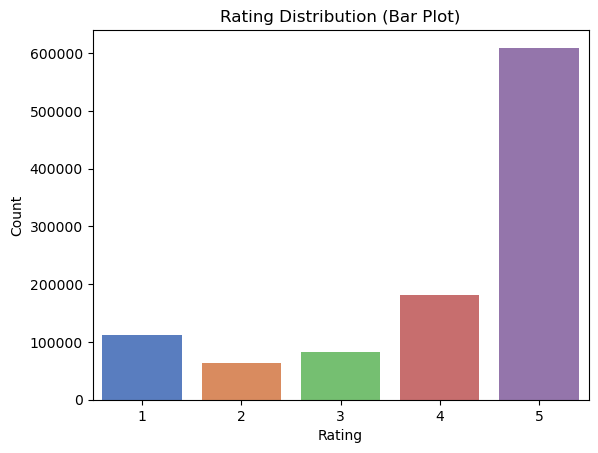

In [85]:
rating_counts = df['rating'].value_counts().sort_index()

sns.barplot(x=rating_counts.index, y=rating_counts.values, palette="muted")
plt.title("Rating Distribution (Bar Plot)")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

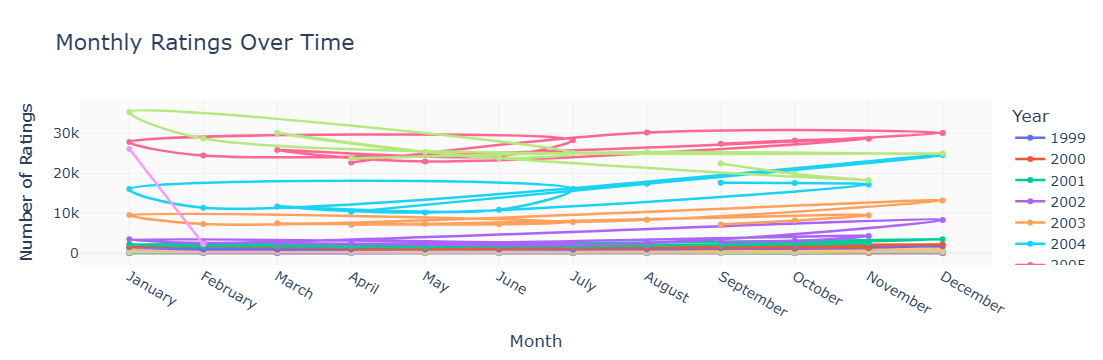

In [86]:
# Group data
monthly = df.groupby(['year', 'month']).size().reset_index(name='count')

# Define proper month order
month_order = ["January", "February", "March", "April", "May", "June",
               "July", "August", "September", "October", "November", "December"]

# Plot with increased height
fig = px.line(
    monthly,
    x='month',
    y='count',
    color='year',
    title='Monthly Ratings Over Time',
    category_orders={'month': month_order},
    markers=True,
    line_shape='spline'
)

fig.update_layout(
    height=700,  # 📏 Increased figure height here
    title_font_size=22,
    xaxis_title="Month",
    yaxis_title="Number of Ratings",
    legend_title="Year",
    font=dict(size=14),
    template="plotly_white",
    plot_bgcolor="#fafafa",
    paper_bgcolor="#fff",
    hovermode="x unified"
)

fig.update_traces(
    marker=dict(size=6),
    line=dict(width=2.5)
)

fig.show()


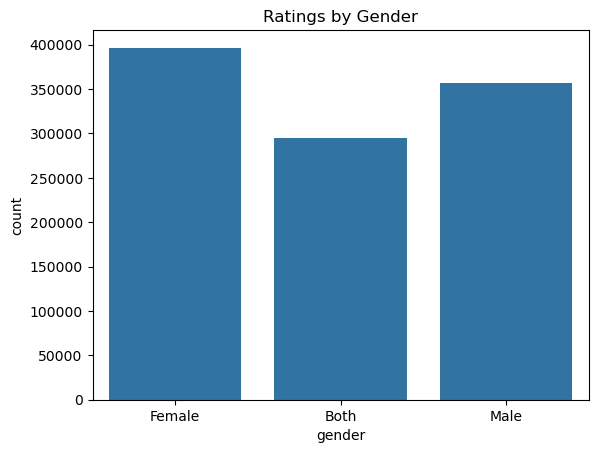

In [87]:
#Gender Count
sns.countplot(x='gender', data=df)
plt.title("Ratings by Gender")
plt.show()

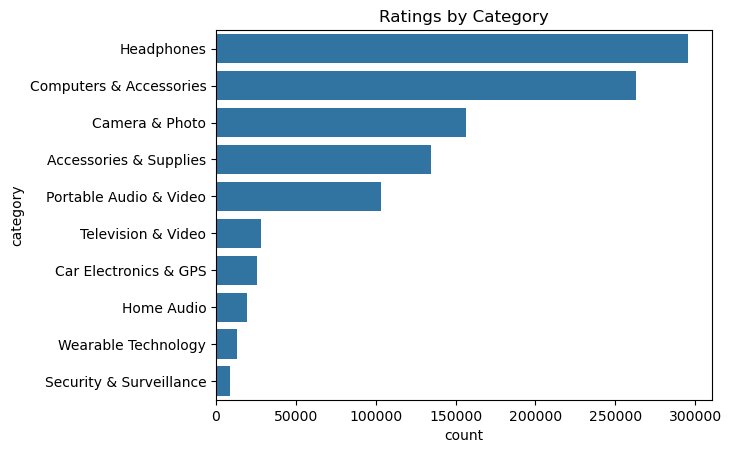

In [92]:
# 3. Category Popularity
sns.countplot(y='category', data=df, order=df['category'].value_counts().index)
plt.title("Ratings by Category")
plt.show()

## Customer Behavior

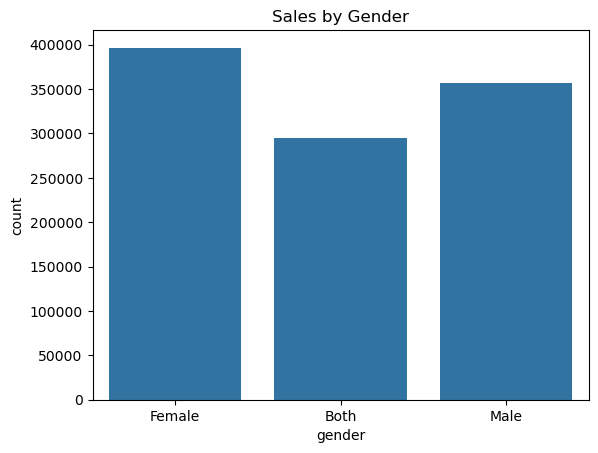

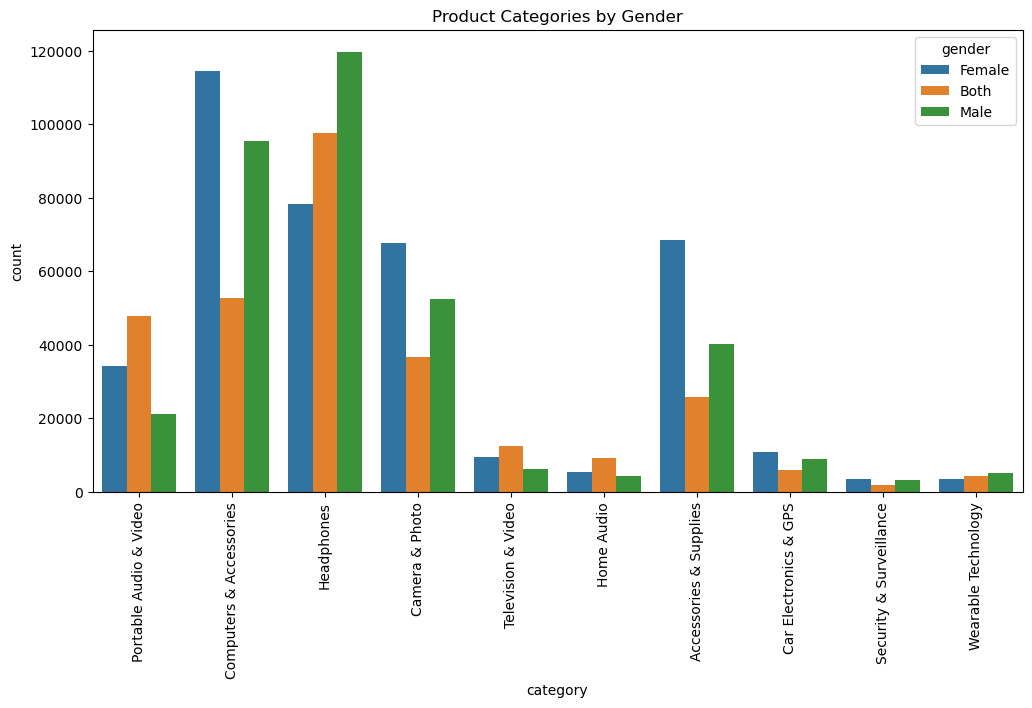

In [94]:
# Gender split
sns.countplot(x='gender', data=df)
plt.title("Sales by Gender")
plt.show()

# Gender vs Category
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='category', hue='gender')
plt.title("Product Categories by Gender")
plt.xticks(rotation=90)
plt.show()


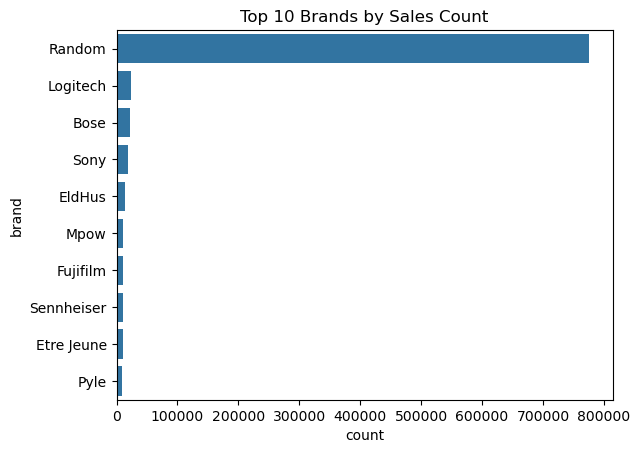

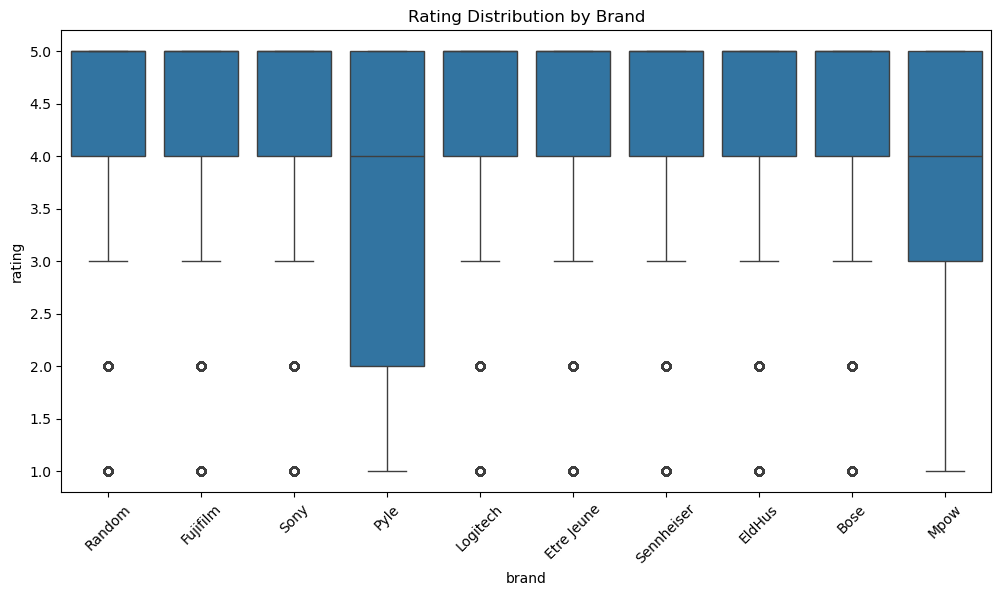

In [95]:
# Top 10 brands
top_brands = df['brand'].value_counts().nlargest(10).index
sns.countplot(y='brand', data=df[df['brand'].isin(top_brands)], order=top_brands)
plt.title("Top 10 Brands by Sales Count")
plt.show()

# Ratings by Brand
plt.figure(figsize=(12, 6))
sns.boxplot(x='brand', y='rating', data=df[df['brand'].isin(top_brands)])
plt.title("Rating Distribution by Brand")
plt.xticks(rotation=45)
plt.show()


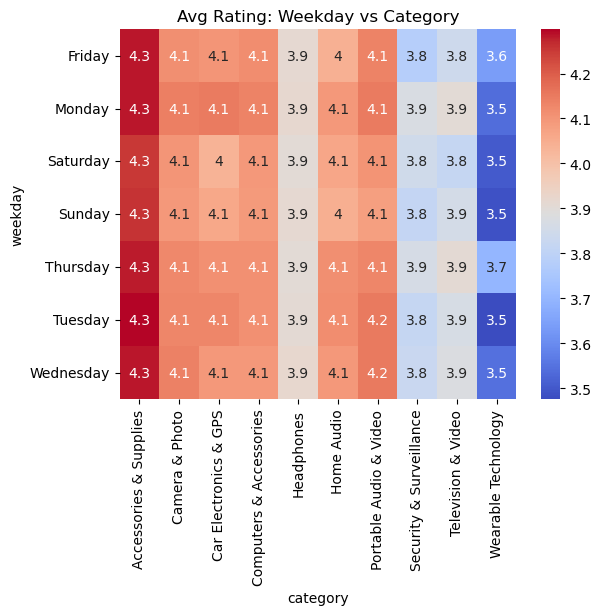

In [96]:
# Heatmap of ratings per category per weekday
pivot = pd.pivot_table(df, values='rating', index='weekday', columns='category', aggfunc='mean')
sns.heatmap(pivot, annot=True, cmap="coolwarm")
plt.title("Avg Rating: Weekday vs Category")
plt.show()


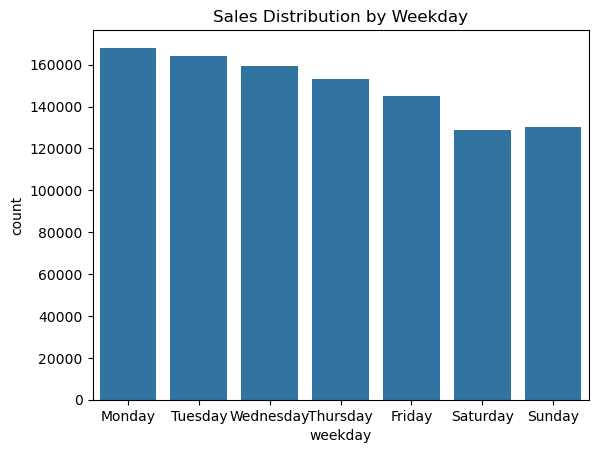

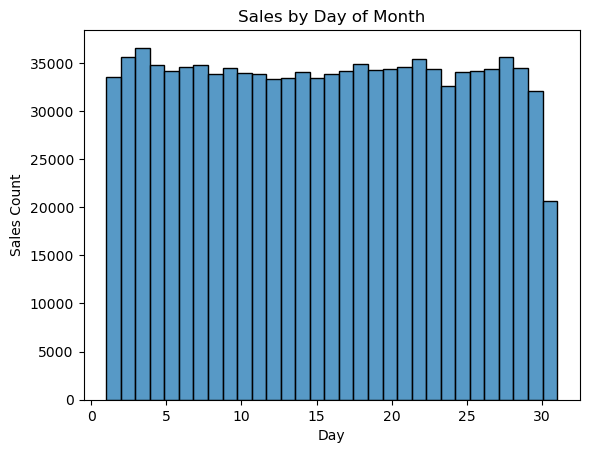

In [97]:
# Weekday distribution
sns.countplot(data=df, x='weekday', order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
plt.title("Sales Distribution by Weekday")
plt.show()

# Day-of-month histogram
sns.histplot(df['day'], bins=31, kde=False)
plt.title("Sales by Day of Month")
plt.xlabel("Day")
plt.ylabel("Sales Count")
plt.show()


# Insights of the Sales Analysis

## 1.Dataset Composition
The dataset comprises 1,048,575 entries spread across 10 well-structured columns, with no missing values, making it ideal for robust analysis. It spans nearly two decades, from June 1999 to February 2017, capturing a wide spectrum of electronic consumer behavior over time. With over 940,000 unique users, the dataset offers a rich, representative sample of the electronics market.

## 2.Gender Distribution
Among the users, females constitute the largest demographic at approximately 38%, followed by males at 34%, and users marked as "Both" at 28%. This shows a relatively balanced gender participation, though with a noticeable female skew. The presence of the “Both” label may suggest shared or unclassified accounts, a detail worth addressing for future segmentation clarity

## 3.Ratings Behavior
User ratings are generally favorable, with an average rating hovering above 4.0 across all gender groups. Specifically, users labeled as “Both” gave the highest average rating (4.10), slightly above females (4.08) and males (4.02). The most frequent rating is 5, indicating a high level of user satisfaction. This upward skew in rating distribution implies either positive user experiences or a possible bias toward higher ratings in digital feedback.

## 4.Category Popularity
The most popular product category is “Headphones,” accounting for nearly 30% of all ratings, followed by "Computers & Accessories" and "Camera & Photo." This trend suggests a strong consumer interest in personal and portable electronics. Categories like "Security & Surveillance" and "Wearable Technology" are niche, contributing the least to overall activity, likely due to specialized usage or limited product availability during the timeframe.

## 5.Brand Dynamics
The dataset reveals a dominant brand entry labeled as “Random,” comprising more than 77% of the total entries, which likely obscures deeper brand-specific insights. Excluding this, top brands include Logitech, Bose, Sony, and EldHus. Among these, brands like Logitech and Bose not only lead in volume but also receive consistently high ratings. A boxplot analysis of ratings by brand further highlights varied customer satisfaction levels across top-performing brands.



## 6.Monthly and Yearly Trends
Sales activity peaks in January and December, suggesting that end-of-year and New Year events like holiday promotions and tech refresh cycles significantly drive consumer purchases. August and July also show strong engagement, potentially linked to mid-year sales or academic calendar shifts. A smooth line plot over time confirms these seasonal surges in demand and underscores the importance of strategic inventory and marketing alignment with calendar events.



## 7.Weekday Insights
The majority of ratings occur during weekends, with Saturday showing consistently high activity. However, the difference across weekdays is relatively narrow, indicating stable daily engagement. A heatmap of average ratings across weekdays and categories reveals subtle shifts in consumer sentiment by day, which may inform optimal promotion timings or support scheduling.



## 8.Gender and Category Interaction
An intersectional view of gender and category preferences shows clear behavioral patterns. For instance, certain categories like “Headphones” and “Portable Audio & Video” skew more heavily toward female users, while others like “Computers & Accessories” attract a more mixed demographic. This highlights the need for gender-sensitive marketing strategies that resonate with the distinct preferences of each segment.



## 9. Brand Popularity and Customer Ratings
Analyzing the top 10 brands reveals clear leaders in terms of both volume and perceived quality. Brands such as Logitech, Sony, and Bose enjoy high engagement and relatively favorable ratings. However, variation in rating distribution—visible through boxplots—suggests that not all popular brands are equally loved, indicating opportunities for quality improvement or brand repositioning among competitive players.

## 10.Sales by Day of the Month
Sales are fairly evenly spread across the days of the month, with minor peaks around the start and middle, likely aligning with pay cycles or monthly promotions. A histogram confirms this pattern, indicating that consumer spending remains consistent throughout the month with a few high-engagement days that could be capitalized on for targeted campaigns.

## 11.Peak Sales Month
Among all months, January emerges as the strongest sales performer with 126,018 transactions. This trend suggests a post-holiday surge in consumer activity, likely driven by end-of-season discounts, gift card usage, or New Year upgrades—making it a prime window for strategic marketing.

## 12.Lowest Sales Month
On the other end, April records the lowest monthly sales at 71,108 transactions. This lull may indicate a seasonal dip in consumer interest, possibly post-fiscal-year fatigue or fewer promotional events during that period. Retailers might consider incentives to boost performance in this quieter month.

## 13.Top-Selling Product Category
The Headphones category dominates all others with 295,747 sales, making up nearly a third of the dataset. This indicates a strong consumer inclination toward personal audio accessories, potentially fueled by lifestyle trends, mobile compatibility, and frequent product upgrades.

## 14.Least Popular Category
The Security & Surveillance category ranks lowest in popularity, registering only 8,797 transactions. Its specialized nature and possibly higher price points may explain its limited consumer base. This niche market could benefit from targeted education and bundled offerings to increase traction.

## 15.Least Purchased Brand
At the bottom of the brand list is Cooper Cases, with just 234 recorded sales. This minimal traction indicates either limited product availability or weak brand recall. Its visibility could be enhanced through influencer marketing, bundling, or improved placement.



# What can they do for improvements!

## 1.Brand Visibility and Transparency
A significant portion of transactions (over 77%) are attributed to the brand label “Random”, suggesting missing or anonymized data. This lack of brand identity likely limits consumer trust and post-sale loyalty. By ensuring accurate brand attribution and highlighting trusted names, sales performance—especially repeat purchases—could see meaningful improvement

## 2.Targeted Promotions in Low-Sales Months
April, the weakest sales month, presents an opportunity for revitalization. Introducing seasonal campaigns like “Spring Tech Refresh” or bundling lesser-selling items with high-demand products (e.g., headphones with accessories) could lift consumer engagement during off-peak periods. Limited-time offers, cashback incentives, and EMI options could further nudge hesitant buyers.

## 3.Category-Level Cross-Selling
Underperforming categories such as Security & Surveillance or Wearable Technology could benefit from intelligent cross-selling. For instance, pairing home security devices with cameras or selling wearables bundled with health-focused marketing could reposition these products from “luxury” to “lifestyle essentials,” driving adoption.

## 4.Gender-Specific Campaigns
Your analysis reveals distinct gender preferences by category. Female users showed stronger engagement with certain audio and portable electronics, while others skewed mixed. Creating gender-personalized landing pages, email campaigns, or recommendations (e.g., curated “For Her” or “For Him” collections) could sharpen targeting and conversion.

## 5.Strategic Weekend Push
Sales are slightly higher on Saturdays, suggesting weekends as peak decision-making windows. Amplifying weekend campaigns—via flash sales, “weekend-only” discounts, or limited drops—could exploit this window further. Pair this with timed emails or push notifications to align with browsing behavior.

## 6.Boosting Low-Rated Brand Performance
While top brands enjoy strong ratings and high sales, some underperform in satisfaction (as shown in brand-wise boxplots). Brands with lower average ratings should be flagged for quality control, improved packaging, post-sale support, or even customer education. Enhancing these could lead to better reviews, which directly influences future buyers.